In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_pickle(r'/content/drive/My Drive/dg-et-both.out')

In [3]:
points  = list(data[1].values())

In [4]:
X = list(points[0])
a = [i[0] for i in X]
y = [i[1] for i in X]
s = [i[2] for i in X]
genre = list(points[1])

In [5]:
space = pd.DataFrame(a, columns=['a'])
space['y'] = y
space['s'] = s
space['color'] = genre
space

,a,y,s,color
0,0.001,0.001,0.000000,8
1,0.001,0.001,0.005025,8
2,0.001,0.001,0.010050,8
3,0.001,0.001,0.015075,8
4,0.001,0.001,0.020101,8
...,...,...,...,...
7999995,0.999,0.999,0.979899,13
7999996,0.999,0.999,0.984925,13
7999997,0.999,0.999,0.989950,13
7999998,0.999,0.999,0.994975,13


In [11]:
mask1 = space['color'] == 1 ### 1 is Shelter and 6 is Backwater
shelter = space[mask1]
shelter = shelter.drop(columns = ['color'])
shelter = shelter.reset_index(drop = True)
a_shelter = list(shelter['a'])
y_shelter = list(shelter['y'])
s_shelter = list(shelter['s'])
shelter

,a,y,s
0,0.001000,0.367101,0.683417
1,0.001000,0.367101,0.688442
2,0.001000,0.367101,0.693467
3,0.001000,0.367101,0.698492
4,0.001000,0.367101,0.703518
...,...,...,...
874682,0.582749,0.999000,0.984925
874683,0.582749,0.999000,0.989950
874684,0.582749,0.999000,0.994975
874685,0.582749,0.999000,1.000000


In [7]:
def plane_cost(volume ):
  A = np.array(list(volume['a']))
  Y = np.array(list(volume['y']))
  S = np.array(list(volume['s']))
  top = max(S)
  bottom = min(S)
  left = min(Y)
  right = max(Y)
  front = max(A)
  back = min(A)
  cost = np.zeros(6)
  crop = []
  ###########upper plane##########
  top_plane = np.where(S >= top)[0]
  cost[0] = len(top_plane)
  crop.append(top_plane)
  ###########bottom plane###########
  bottom_plane = np.where(S <= bottom)[0]
  cost[1] = len(bottom_plane)
  crop.append(bottom_plane)
  ##########left plane###########
  left_plane = np.where(Y <= left)[0]
  cost[2] = len(left_plane)
  crop.append(left_plane)
  #########right plane##########
  right_plane = np.where(Y >= right)[0]
  cost[3] = len(right_plane)
  crop.append(right_plane)
  ##########front plane############
  front_plane = np.where(A >= front)[0]
  cost[4] = len(front_plane)
  crop.append(front_plane)
  ###########back plane###########
  back_plane = np.where(A <= back)[0]
  cost[5] = len(back_plane)
  crop.append(back_plane) 
  ##########################################
  drop_indexes = crop[np.argmin(cost)]
  volume = volume.drop(index = drop_indexes)
  volume = volume.reset_index(drop = True)
  V = int((top - bottom) * (right - left) * (front - back) / (0.005)**3)
  number_of_points = len(list(volume['a']))
  if V - number_of_points <= 0 :
    enough = 1
  else:
    enough = 0


  return volume , enough

In [ ]:
box = shelter
counter = 0
finalized = 0
while (finalized == 0):
  print(counter)
  counter += 1
  box , finalized = plane_cost(box)


In [9]:
## MAking the points of volume of the box boundaries
a_box = list(box ['a'])
y_box = list(box['y'])
s_box = list(box['s'])
Xul = max(a_box) ## a upper limit
Xll = min(a_box) ## a lower limit
Yul = max(y_box) ## y upper limit
Yll = min(y_box) ## y lower limit
Zul = max(s_box)    ## s upper limit
Zll = min(s_box)   ## s lower limit
N = 100
box_X = np.arange(Xll , Xul,(Xul - Xll)/N)
box_Y = np.arange(Yll , Yul,(Yul - Yll)/N)
box_Z = np.arange(Zll , Zul,(Zul - Zll)/N)
xx = []
yy = []
zz = []
for x in box_X:
  for y in box_Y:
    for z in box_Z:
      xx.append(x)
      yy.append(y)
      zz.append(z)

Text(0.5, 0, 'S')

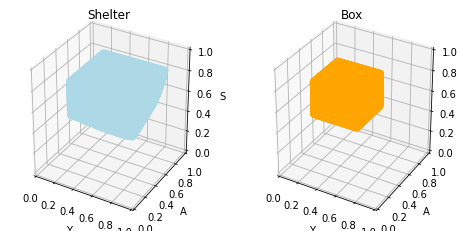

In [12]:
# ax = plt.axes(projection='3d', alpha = 0.5)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(y_shelter ,a_shelter,s_shelter , c = 'lightblue')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_title('Shelter')
ax.set_xlabel('Y')
ax.set_ylabel('A')
ax.set_zlabel('S')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(yy ,xx,zz , c = 'orange' , alpha = 0.5)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_title('Box')
ax.set_xlabel('Y')
ax.set_ylabel('A')
ax.set_zlabel('S')
# ax.text(str(Xll)'< a <')

In [121]:
###box boundaries
print( round(Xll,4) , '< a <', round(Xul,4))
print( round(Yll,4) , '< y <', round(Yul,4))
print( round(Zll,4) , '< s <', round(Zul,4))

0.001 < a < 0.4273
0.3671 < y < 0.8134
0.6834 < s < 1.0
